# Projeto 3 - Modelando um sistema mecânico: Pêndulo Elástico

## Importando bibliotecas

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

## Definindo variáveis globais

In [2]:
g = 10                            # Aceleração da gravidade [m/s2]

r = 0.015                         # Raio do cilindro [m]

h = 0.088                         # Altura do cilindro [m]

A = 2*r*h                         # Área [m2]

m = np.arange(0.17, 0.3, 0.01)    # Massas dos cilindros [kg]

k = 6.2                           # Constante elástica da mola [N/m]

l0 = 0.16                         # Comprimento da mola sem deformação [m]

rho_ar = 1                        # Densidade do ar [kg/m3]

Cd = 0.82                         # Coeficiente de arrasto

## Criando as funções

In [3]:
# Implementando função do modelo
# Simplificações feitas / abstração

    # Objeto considerado um ponto material
    # Considera resistência do ar

    # Objetivo: quanto tempo demora para um pendulo de diferentes massas parar?

def modelo(c0, tempo, m):

    x = c0[0]
    y = c0[1]
    vx = c0[2]
    vy = c0[3]

    l = ((x**2)+(y**2))**0.5    # Definindo o comprimento da mola com os valores de x e y de cada momento
    Fel = k * (l - l0)          # Fórmula da força elástica
    seno_theta = x/l            # seno theta (ângulo entre força elástica e eixo x)
    cosseno_theta = -y/l        # cosseno theta (ângulo entre força elástica e eixo y)
    

    Dx = (1/2)*(rho_ar*A*Cd*vx*((vx**2)+(vy**2))**0.5)    # Fórmula do arrasto decomposta no eixo x
    Dy = (1/2)*(rho_ar*A*Cd*vy*((vx**2)+(vy**2))**0.5)    # Fórmula do arrasto decomposta no eixo y

    dxdt = vx                                             # Cálculo das derivadas 
    dydt = vy
    dvxdt = (1/m)*(-(Fel*seno_theta)-Dx)
    dvydt = (1/m)*(Fel*cosseno_theta-Dy-(m*g))

    dXdt = [dxdt, dydt, dvxdt, dvydt]
    
    return dXdt

## Condições iniciais, ODEINT e gráficos

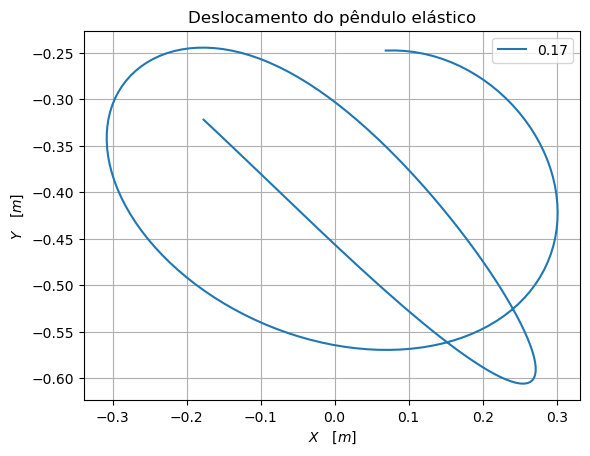

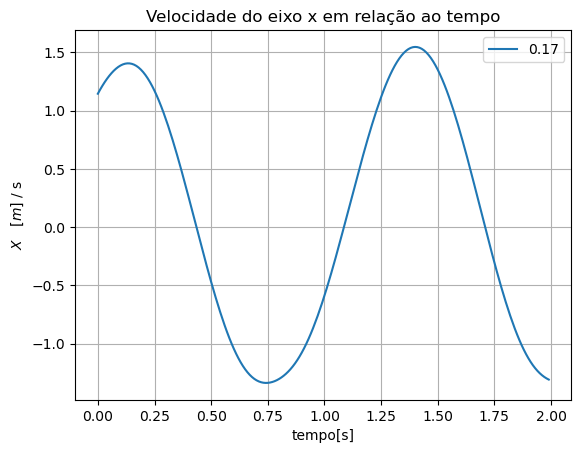

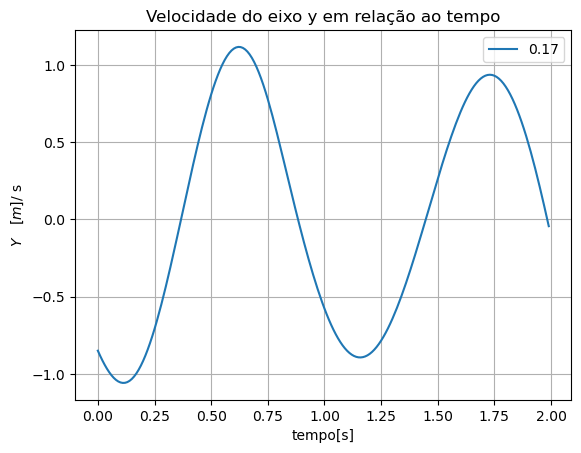

In [4]:
#posicoes iniciais
x0 = -0.177                      
y0 = -0.322
vx0 = 1.145
vy0 = -0.85

CI = [x0, y0, vx0, vy0]                                 # Lista das condições iniciais

tf = 2                                                  # Tempo final
dt = 1e-2                                               # Intervalo de tempo
tempo = np.arange(0, tf, dt)                            # Lista de tempo

resultado = odeint(modelo, CI, tempo, args = (m[0],))   # Realizando odeint apenas para a esfera de teste

pos_x = resultado[:,0]                                  # Lista das posições de x, conforme os resultados da odeint
pos_y = resultado[:,1]                                  # Lista das posições de y, conforme os resultados da odeint
velocidade_x = resultado[:,2]                           # Lista das velocidades em x, conforme os resultados da odeint
velocidade_y = resultado[:,3]                           # Lista das velocidades em y, conforme os resultados da odeint

plt.plot(pos_x, pos_y, label = m[0])                    # Plotando deslocamento do pêndulo
plt.title('Deslocamento do pêndulo elástico')
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(tempo, velocidade_x, label = m[0])             # Plotando a variação da velocidade em x do pêndulo pelo tempo
plt.title('Velocidade do eixo x em relação ao tempo')
plt.xlabel('tempo[s]')
plt.ylabel('$X \quad [m]$ / s')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(tempo, velocidade_y, label = m[0])             # Plotando a variação da velocidade em y do pêndulo pelo tempo
plt.title('Velocidade do eixo y em relação ao tempo')
plt.xlabel('tempo[s]')
plt.ylabel('$Y \quad [m]$/ s')
plt.legend()
plt.grid(True)
plt.show()

## Validando o sistema

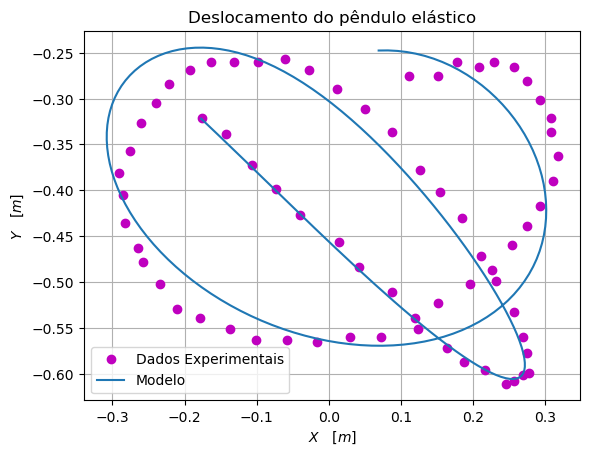

O modelo pode ser considerado válido para tal projeto, visto que os valores máximos de alcance estavam próximos, modelando os alcances máximos obtidos por diferentes massas fielmente, sendo X[m] máximo do modelo = 0.31m e do experimento = 0.32m, Y[m] máximo do modelo = 0.61m e do experimento = 0.61m


In [5]:
#Importando dados usados no tracker, dados experimentais
import pandas 
colunas = ['t', 'x', 'y', 'vx', 'vy']
data = pandas.read_csv('p3 t5 dados.txt', names = colunas)

# Separando cada valor armazenado pelo tracker em sublistas
te = data.t.tolist()
xe = data.x.tolist()
ye = data.y.tolist()
vxe = data.vx.tolist()
vye = data.vy.tolist()

# Plotando em um mesmo gráfico os dados experimentais e do modelo para validação
plt.plot(xe, ye, 'mo', label = 'Dados Experimentais')
plt.plot(pos_x, pos_y, label = 'Modelo')
plt.title('Deslocamento do pêndulo elástico')
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()


x_e = []
y_e = []
 
for i in range(len(xe)):                   # Pegando os valores absolutos de alcance de x e y
    x_e.append(abs(xe[i]))
    y_e.append(abs(ye[i]))

x_max_modelo = max(abs(pos_x))             # Definindo os máximos alcances de x e y conforme o modelo e o experimento
x_max_experimento = max(x_e)
y_max_modelo = max(abs(pos_y))
y_max_experimento = max(y_e)

print('O modelo pode ser considerado válido para tal projeto, visto que os valores máximos de alcance estavam próximos, modelando os alcances máximos obtidos por diferentes massas fielmente, sendo X[m] máximo do modelo = {0:,.2f}m e do experimento = {1:,.2f}m, Y[m] máximo do modelo = {2:,.2f}m e do experimento = {3:,.2f}m'. format(x_max_modelo, x_max_experimento, y_max_modelo, y_max_experimento) )


## Projetando gráfico conclusivo

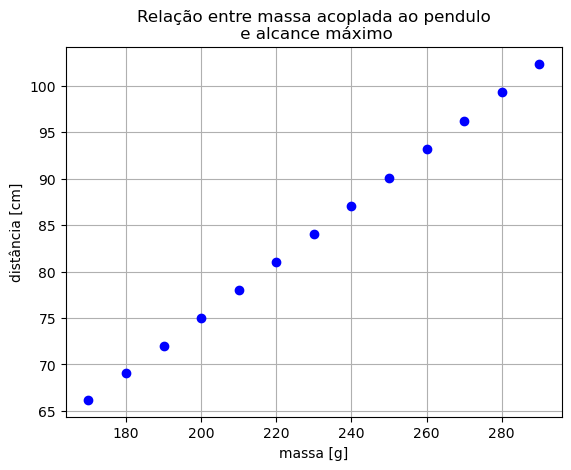

In [6]:
lista_posicoes =[]
tempo_conclusivo = np.arange(0,400,1e-2)         # Definindo novo tempo para rodar por mais tempo o modelo


for i in range(len(m)):                          # Rodando novamente o odeint com nova lista tempo com diferentes massas
    result = odeint(modelo, CI, tempo_conclusivo, args = (m[i],))
    pos_x = result[:,0]
    pos_y = result[:,1]
    pos_max = 0
    
    
    for j in range(len(tempo_conclusivo)):       # Rodando cada lista obtida para definição do alcance máximo
        pos = ((abs(pos_x[j]**2) + (abs(pos_y[j]**2))))**0.5
        
        if pos > pos_max:
            pos_max = pos                 

    lista_posicoes.append(pos_max*100)           # Armazenando os valores de alcance máximo
    

plt.plot(m*1000, lista_posicoes, 'bo')    
plt.title('Relação entre massa acoplada ao pendulo\n e alcance máximo')
plt.xlabel('massa [g]')
plt.ylabel('distância [cm]')

plt.grid(True)
plt.show()

## Animando o sistema

In [8]:
# Importando as bibliotecas para animação
%matplotlib qt5
plt.close('all')
get_ipython().magic('matplotlib qt5')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

fig = plt.figure(figsize=(8,9))                            # Definindo tamanho da figura

ax = fig.add_subplot(111)                                  # Definindo limite dos eixos
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 1)

elastico1, = ax.plot([], [], 'black', lw=2)
esfera = patches.Circle((0,-10), 100*r, fc='black')        # Definindo posição e cores da esfera
barra = patches.Rectangle((-20,0), 100, 1, fc='black' )    # Definindo posição e cores da barra de suporte

def init():                                                # Iniciando as animações adicionando elementos
    elastico1.set_data([], [])
    ax.add_patch(esfera)
    return None

def animate(i):                                            # Iniciando as animações com as posições em x e y 
    origem = (0,0)                                         # origem fixa do elástico
    pos_x_i = pos_x[i]
    pos_y_i = pos_y[i]
    ax.add_patch(barra)                                    # Posicionando a barra
    elastico1.set_data([origem[0], 14.5*pos_x_i], [origem[1], 14.5*pos_y_i])
    esfera.center = 15*pos_x_i, 15*pos_y_i
    
    return None

plt.title('Trajetória do pêndulo elástico')
plt.xlabel('$x \quad [cm]$')
plt.ylabel('$y \quad [cm]$')

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(pos_y), interval=5, blit=False)

/var/folders/ks/26c_s_px7hj2hnv_lh09p7f80000gn/T/ipykernel_54622/1722488251.py:3: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib qt5')
